In [ ]:
# monta o drive na raiz, assim podemos manipular, ler e salvar
# arquivos no proprio google drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# vai para a pasta que está o arquivo do Google Colab
# IMPORTANTE, VOCES PRECISAM AJUSTAR PARA A PASTA

In [ ]:
cd 'drive/MyDrive/Semestre 2023 2/Pós Big Data and Data Science'

[Errno 2] No such file or directory: 'drive/MyDrive/Semestre 2023 2/Pós Big Data and Data Science'
/content/drive/MyDrive/Semestre 2023 2/Pós Big Data and Data Science


In [ ]:
# biblioteca para trabalhar com dados tabulares
import pandas as pd
# biblioteca para trabalhar com vetores, matrizes
import numpy as np
# biblioteca para plotar gráficos
import matplotlib.pyplot as plt

# importa as metricas do sklearn, aqui estão as funções para
# calcular a acurácia, f1-score, recall, etc
from sklearn import metrics
# funcoes auxiliares para fazer a divisão do dataset
# o train_test_split divide em treino e teste
# o KFold auxilia na criação dos "folds" para o K-Fold
from sklearn.model_selection import KFold, train_test_split

# importa o modelo kNN
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# faz a leitura do conjunto de dados
dados = pd.read_csv('titanic.csv')
dados = dados.drop(['PassengerId'], axis=1)

In [ ]:
# printa as primeiras cinco linhas do nosso conjunto de dados
dados.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# descritivos dos dados
dados.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [ ]:
dados.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
687/891

0.7710437710437711

In [ ]:
dados['Age'].mean()

29.69911764705882

In [ ]:
dados[dados['Pclass']==1]['Age'].mean(), \
dados[dados['Pclass']==2]['Age'].mean(), \
dados[dados['Pclass']==3]['Age'].mean()

(38.233440860215055, 29.87763005780347, 25.14061971830986)

In [ ]:
dados[((dados['Pclass']==1) & (dados['Sex']=='male'))]['Age'].mean(), \
dados[((dados['Pclass']==2) & (dados['Sex']=='male'))]['Age'].mean(), \
dados[((dados['Pclass']==3) & (dados['Sex']=='male'))]['Age'].mean()

NameError: ignored

In [ ]:
dados[((dados['Pclass']==1) & (dados['Sex']=='female'))]['Age'].mean(), \
dados[((dados['Pclass']==2) & (dados['Sex']=='female'))]['Age'].mean(), \
dados[((dados['Pclass']==3) & (dados['Sex']=='female'))]['Age'].mean()

(34.61176470588235, 28.722972972972972, 21.75)

In [ ]:
dados[dados['Sex']=='female']['Age'].mean()

27.915708812260537

In [ ]:
dados[dados['Sex']=='male']['Age'].mean()

30.72664459161148

In [ ]:
dados = dados.drop(['Cabin', 'Ticket', 'Name'], axis=1)

<Axes: >

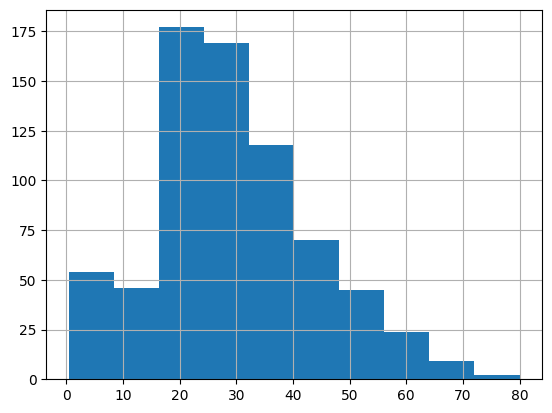

In [ ]:
dados['Age'].hist()

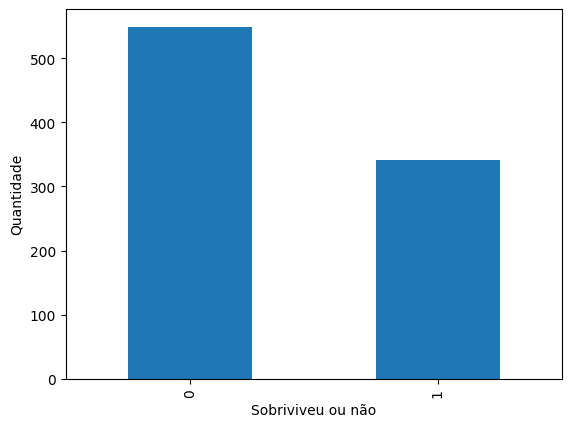

In [ ]:
ax = dados.Survived.value_counts().plot(kind='bar')
ax.set_xlabel('Sobriviveu ou não')
ax.set_ylabel('Quantidade')
plt.show()

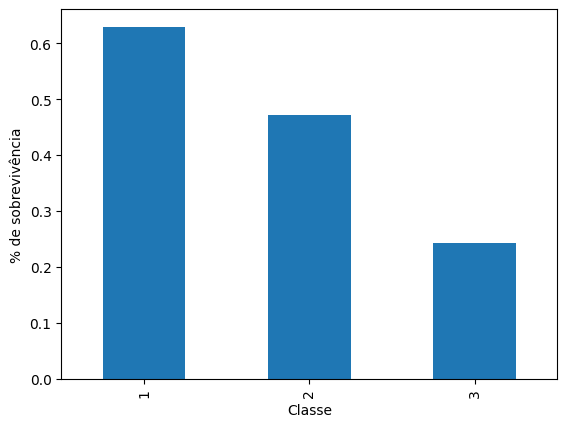

In [ ]:
ax = (dados[dados['Survived'] == 1].Pclass.value_counts().sort_index() / dados.Pclass.value_counts().sort_index()).plot(kind='bar', title='')
ax.set_xlabel('Classe')
ax.set_ylabel('% de sobrevivência')
plt.show()

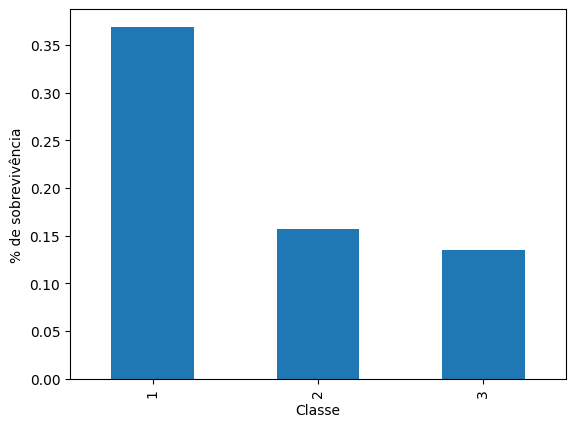

In [ ]:
ax = (dados[((dados['Survived'] == 1)&(dados['Sex']=='male'))].Pclass.value_counts().sort_index() / dados[dados['Sex']=='male'].Pclass.value_counts().sort_index()).plot(kind='bar', title='')
ax.set_xlabel('Classe')
ax.set_ylabel('% de sobrevivência')
plt.show()

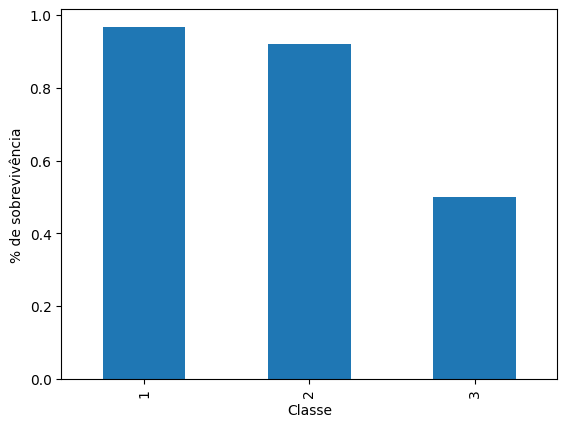

In [ ]:
ax = (dados[((dados['Survived'] == 1)&(dados['Sex']=='female'))].Pclass.value_counts().sort_index() / dados[dados['Sex']=='female'].Pclass.value_counts().sort_index()).plot(kind='bar', title='')
ax.set_xlabel('Classe')
ax.set_ylabel('% de sobrevivência')
plt.show()

In [ ]:
# Mapeia o 'Sexo' e 'Embarcado' para valores numéricos.
dados['Sex'] = dados['Sex'].map({'male':0, 'female':1})
dados['Embarked'] = dados['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [ ]:
dados.groupby(['Pclass','Sex'])['Age'].mean()

Pclass  Sex
1       0      41.281386
        1      34.611765
2       0      30.740707
        1      28.722973
3       0      26.507589
        1      21.750000
Name: Age, dtype: float64

In [ ]:
# Impute a idade pela média da classe
class_age_means = dados.groupby(['Pclass','Sex'])['Age'].mean()

def impute_age(row):
    if pd.isnull(row['Age']):
        return class_age_means[row['Pclass']][row['Sex']]
    return row['Age']

dados['Age'] = dados.apply(impute_age, axis=1)

In [ ]:
dados.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [ ]:
dados = dados.dropna()

In [ ]:
dados.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
# faz a divisão de 80% treino e 20% teste
# da pra controlar o tamanho é só ajustar o test_size
X_train, X_test, y_train, y_test = train_test_split(dados.drop(['Survived'], axis=1),
                                                    dados['Survived'],
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
# verifica se deu certo o corte dos dados
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(711, 7) (711,)
(178, 7) (178,)


In [ ]:
# cria o KFold com tamanho de 5
kf = KFold(n_splits=5)

# cria os splits com base no conjunto de treino
kf.get_n_splits(X_train)

# listas para as metricas de desempenho
acc = []
f1 = []
sen = []
pre = []

# faz o loop para realizar o treinamento dos K modelos
for i, (train_index, test_index) in enumerate(kf.split(X_train)):
  # print(f"Fold {i}:")

  knn = KNeighborsClassifier(n_neighbors=3)
  knn.fit(X_train.loc[X_train.index[train_index]],
          y_train.loc[y_train.index[train_index]])

  y_pred = knn.predict(X_train.loc[X_train.index[test_index]])

  f1.append(metrics.f1_score(y_train[y_train.index[test_index]],
                             y_pred, average='macro'))
  acc.append(metrics.accuracy_score(y_train[y_train.index[test_index]],
                             y_pred))
  sen.append(metrics.recall_score(y_train[y_train.index[test_index]],
                             y_pred, average='macro'))
  pre.append(metrics.precision_score(y_train[y_train.index[test_index]],
                             y_pred, average='macro'))

In [ ]:
# printa as métricas de desempenho, com média e desvio padrão
print('Accuracy', np.array(acc).mean()*100, "% std:", np.array(acc).std())
print('F1-score', np.array(f1).mean()*100, "% std:", np.array(f1).std())
print('Sensibilidade', np.array(sen).mean()*100, "% std:", np.array(sen).std())
print('Precisão', np.array(pre).mean()*100, "% std:", np.array(pre).std())

Accuracy 70.46784201713778 % std: 0.03528293480988631
F1-score 68.06301572940603 % std: 0.038864351279755634
Sensibilidade 68.19396021846241 % std: 0.04084614988942294
Precisão 68.75526416242272 % std: 0.034621291691050424


In [ ]:
### PARA VARIAR O TAMANHO DO KNN É SÓ ADICIONAR
### MAIS UM FOR POR FORA DO K FOLD

# cria o KFold com tamanho de 5
kf = KFold(n_splits=5)

# cria os splits com base no conjunto de treino
kf.get_n_splits(X_train)

# listas para as metricas de desempenho
acc = []
f1 = []
sen = []
pre = []

### LOOP PARA VARIAR O TAMANHO DO K DO KNN
for knn_size in range(1,60):
  # faz o loop para realizar o treinamento dos K modelos
  for i, (train_index, test_index) in enumerate(kf.split(X_train)):
    # print(f"Fold {i}:")

    knn = KNeighborsClassifier(n_neighbors=knn_size)
    knn.fit(X_train.loc[X_train.index[train_index]],
            y_train.loc[y_train.index[train_index]])

    y_pred = knn.predict(X_train.loc[X_train.index[test_index]])

    f1.append(metrics.f1_score(y_train[y_train.index[test_index]],
                              y_pred, average='macro'))
    acc.append(metrics.accuracy_score(y_train[y_train.index[test_index]],
                              y_pred))
    sen.append(metrics.recall_score(y_train[y_train.index[test_index]],
                              y_pred, average='macro'))
    pre.append(metrics.precision_score(y_train[y_train.index[test_index]],
                              y_pred, average='macro'))


  # printa as métricas de desempenho, com média e desvio padrão
  print('****', knn, "Métricas", "****")
  print('Accuracy', np.array(acc).mean()*100, "% std:", np.array(acc).std())
  print('F1-score', np.array(f1).mean()*100, "% std:", np.array(f1).std())
  print('Sensibilidade', np.array(sen).mean()*100, "% std:", np.array(sen).std())
  print('Precisão', np.array(pre).mean()*100, "% std:", np.array(pre).std())
  print('\n\n\n\n')

**** KNeighborsClassifier(n_neighbors=1) Métricas ****
Accuracy 69.90249187432286 % std: 0.03055677187375756
F1-score 67.4300895859555 % std: 0.037769473810611055
Sensibilidade 67.42550698684893 % std: 0.036289339010967085
Precisão 68.20062619225432 % std: 0.043029456275566536





**** KNeighborsClassifier(n_neighbors=2) Métricas ****
Accuracy 69.48192652418004 % std: 0.03990594797686202
F1-score 64.89083542722416 % std: 0.052930859553155664
Sensibilidade 65.16891361288037 % std: 0.04523454679902946
Precisão 68.73571766963296 % std: 0.05092674543145665





**** KNeighborsClassifier(n_neighbors=3) Métricas ****
Accuracy 69.8105650218326 % std: 0.03870683322079075
F1-score 65.94822886128478 % std: 0.05093995848416296
Sensibilidade 66.17726248140772 % std: 0.0460825233445848
Precisão 68.74223316722954 % std: 0.04613648631998662





**** KNeighborsClassifier(n_neighbors=4) Métricas ****
Accuracy 69.58928395548114 % std: 0.04043817896323779
F1-score 65.50773594610038 % std: 0.05184707081

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:
# Lista de algoritmos para testar
models = [
    ("AdaBoost", AdaBoostClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("XGBoost", XGBClassifier()),
    ("LightGBM", LGBMClassifier())
]

for model_name, model in models:
    acc = []
    f1 = []
    sen = []
    pre = []

    for i, (train_index, test_index) in enumerate(kf.split(X_train)):
        # Treine o modelo atual
        model.fit(X_train.loc[X_train.index[train_index]], \
                  y_train.loc[y_train.index[train_index]])
        y_pred = model.predict(X_train.loc[X_train.index[test_index]])

        # Calcule as métricas
        f1.append(metrics.f1_score(y_train[y_train.index[test_index]], \
                                   y_pred, average='macro'))
        acc.append(metrics.accuracy_score(y_train[y_train.index[test_index]], y_pred))
        sen.append(metrics.recall_score(y_train[y_train.index[test_index]], y_pred, average='macro'))
        pre.append(metrics.precision_score(y_train[y_train.index[test_index]], y_pred, average='macro'))

    print(f'Modelo: {model_name}')
    print('Accuracy', np.array(acc).mean()*100, "% std:", np.array(acc).std())
    print('F1-score', np.array(f1).mean()*100, "% std:", np.array(f1).std())
    print('Sensibilidade', np.array(sen).mean()*100, "% std:", np.array(sen).std())
    print('Precisão', np.array(pre).mean()*100, "% std:", np.array(pre).std())
    print('-' * 50)

Modelo: AdaBoost
Accuracy 81.57194917758298 % std: 0.022236146278707833
F1-score 80.09958159833198 % std: 0.02381341136343718
Sensibilidade 79.81145441325518 % std: 0.024785221476923663
Precisão 80.51828483384075 % std: 0.022373816417101552
--------------------------------------------------
Modelo: Gradient Boosting
Accuracy 81.71771890081749 % std: 0.011462856986466874
F1-score 80.11141101826918 % std: 0.008557342556527526
Sensibilidade 79.6412427981321 % std: 0.009073867403397344
Precisão 81.01359141324025 % std: 0.008215239512031677
--------------------------------------------------
Modelo: XGBoost
Accuracy 80.5948980596868 % std: 0.01761150039423096
F1-score 79.16581422492051 % std: 0.018299386567047594
Sensibilidade 79.0832669762244 % std: 0.020538894310777565
Precisão 79.46464741172002 % std: 0.014786105026704324
--------------------------------------------------
[LightGBM] [Info] Number of positive: 212, number of negative: 356
[LightGBM] [Warning] Auto-choosing col-wise multi-t

In [ ]:
## GRID SEARCH

from sklearn.model_selection import GridSearchCV

# Defina um espaço de busca para Grid Search
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

kf = KFold(n_splits=5)  # Define K-fold com 5 splits
grid_search = GridSearchCV(estimator=LGBMClassifier(),
                           param_grid=param_grid,
                           cv=kf,
                           scoring='accuracy',
                           verbose=1,
                           n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 271, number of negative: 440
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000158 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 203
[LightGBM] [Info] Number of data points in the train set: 711, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381153 -> initscore=-0.484656
[LightGBM] [Info] Start training from score -0.484656
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy', verbose=1)

In [ ]:
print("Melhores hiperparâmetros encontrados pelo Grid Search:")
print(grid_search.best_params_)

Melhores hiperparâmetros encontrados pelo Grid Search:
{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50}


In [ ]:
### RANDOM SEARCH

from sklearn.model_selection import RandomizedSearchCV

# Defina um espaço de busca para Random Search
param_dist = {
    'n_estimators': np.arange(50, 200, 10),
    'learning_rate': np.arange(0.01, 0.2, 0.01),
    'max_depth': np.arange(3, 10),
}

random_search = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                                   param_distributions=param_dist,
                                   n_iter=50,
                                   cv=kf,
                                   scoring='accuracy',
                                   verbose=1,
                                   n_jobs=-1,
                                   random_state=42)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=GradientBoostingClassifier(), n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19]),
                                        'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
       180, 190])},
                   random_state=42, scoring='accuracy', verbose=1)

In [ ]:
print("\nMelhores hiperparâmetros encontrados pelo Random Search:")
print(random_search.best_params_)


Melhores hiperparâmetros encontrados pelo Random Search:
{'n_estimators': 110, 'max_depth': 3, 'learning_rate': 0.02}


In [ ]:
!pip install scikit-optimize

In [ ]:
### BAYESIAN SEARCH

from skopt import BayesSearchCV

# Defina um espaço de busca para scikit-optimize (skopt)
param_space = {
    'n_estimators': (50, 200),
    'learning_rate': (0.01, 0.2),
    'max_depth': (3, 10)
}

bayes_search = BayesSearchCV(LGBMClassifier(),
                             param_space,
                             cv=kf,
                             n_iter=50,
                             scoring='accuracy',
                             verbose=1,
                             n_jobs=-1)
bayes_search.fit(X_train, y_train)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

BayesSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
              estimator=LGBMClassifier(), n_jobs=-1, scoring='accuracy',
              search_spaces={'learning_rate': (0.01, 0.2), 'max_depth': (3, 10),
                             'n_estimators': (50, 200)},
              verbose=1)

In [ ]:
print("\nMelhores hiperparâmetros encontrados pelo Bayes Search:")
print(bayes_search.best_params_)

In [ ]:
# Avalie o desempenho do modelo otimizado para cada método de busca
best_params_grid = grid_search.best_params_
best_params_random = random_search.best_params_
best_params_bayes = bayes_search.best_params_

best_models = {
    "Grid Search": LGBMClassifier(**best_params_grid),
    "Random Search": LGBMClassifier(**best_params_random),
    "Bayes Search (skopt)": LGBMClassifier(**best_params_bayes)
}

for model_name, model in best_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = metrics.accuracy_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred, average='macro')
    sen = metrics.recall_score(y_test, y_pred, average='macro')
    pre = metrics.precision_score(y_test, y_pred, average='macro')

    print(f'{model_name} - Accuracy: {acc}, F1-score: {f1}, Sensitivity: {sen}, Precision: {pre}')

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 271, number of negative: 440
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000167 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 203
[LightGBM] [Info] Number of data points in the train set: 711, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381153 -> initscore=-0.484656
[LightGBM] [Info] Start training from score -0.484656
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

In [ ]:
# Lista de algoritmos para testar

best_params_grid = grid_search.best_params_
best_params_random = random_search.best_params_
best_params_bayes = bayes_search.best_params_

best_models = [
    ("Grid Search", LGBMClassifier(**best_params_grid)),
    ("Random Search", LGBMClassifier(**best_params_random)),
    ("Bayes Search (skopt)", LGBMClassifier(**best_params_bayes))
]

for model_name, model in best_models:
    acc = []
    f1 = []
    sen = []
    pre = []

    for i, (train_index, test_index) in enumerate(kf.split(X_train)):
        # Treine o modelo atual
        model.fit(X_train.loc[X_train.index[train_index]], y_train.loc[y_train.index[train_index]])
        y_pred = model.predict(X_train.loc[X_train.index[test_index]])

        # Calcule as métricas
        f1.append(metrics.f1_score(y_train[y_train.index[test_index]], y_pred, average='macro'))
        acc.append(metrics.accuracy_score(y_train[y_train.index[test_index]], y_pred))
        sen.append(metrics.recall_score(y_train[y_train.index[test_index]], y_pred, average='macro'))
        pre.append(metrics.precision_score(y_train[y_train.index[test_index]], y_pred, average='macro'))

    print(f'Modelo: {model_name}')
    print('Accuracy', np.array(acc).mean()*100, "% std:", np.array(acc).std())
    print('F1-score', np.array(f1).mean()*100, "% std:", np.array(f1).std())
    print('Sensibilidade', np.array(sen).mean()*100, "% std:", np.array(sen).std())
    print('Precisão', np.array(pre).mean()*100, "% std:", np.array(pre).std())
    print('-' * 50)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 212, number of negative: 356
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000123 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 188
[LightGBM] [Info] Number of data points in the train set: 568, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.373239 -> initscore=-0.518344
[LightGBM] [Info] Start training from score -0.518344
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

In [ ]:
model = XGBClassifier(objective='binary:hinge')
model.fit(X_train.loc[X_train.index[train_index]], y_train.loc[y_train.index[train_index]])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='binary:hinge', predictor=None, ...)

In [ ]:
import pickle

with open('model.pkl', 'wb') as model_file:
  pickle.dump(model, model_file)

In [ ]:
!pip freeze

absl-py==1.4.0
aiohttp==3.8.5
aiosignal==1.3.1
alabaster==0.7.13
albumentations==1.3.1
altair==4.2.2
annotated-types==0.5.0
anyio==3.7.1
appdirs==1.4.4
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array-record==0.4.1
arviz==0.15.1
astropy==5.3.2
astunparse==1.6.3
async-timeout==4.0.3
attrs==23.1.0
audioread==3.0.0
autograd==1.6.2
Babel==2.12.1
backcall==0.2.0
beautifulsoup4==4.11.2
bleach==6.0.0
blinker==1.4
blis==0.7.10
blosc2==2.0.0
bokeh==3.2.2
branca==0.6.0
build==0.10.0
CacheControl==0.13.1
cachetools==5.3.1
catalogue==2.0.9
certifi==2023.7.22
cffi==1.15.1
chardet==5.2.0
charset-normalizer==3.2.0
chex==0.1.7
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloudpickle==2.2.1
cmake==3.27.2
cmdstanpy==1.1.0
colorcet==3.0.1
colorlover==0.3.0
community==1.0.0b1
confection==0.1.1
cons==0.4.6
contextlib2==21.6.0
contourpy==1.1.0
convertdate==2.4.0
cryptography==41.0.3
cufflinks==0.17.3
cvxopt==1.3.2
cvxpy==1.3.2
cycler==0.11.0
cymem==2.0.7
Cython==0.29.36
dask==2023.8.1
datascience==0